In [ ]:
import rasterio
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib import colors

In [ ]:
# read raw data

north_raster = rasterio.open("20130824_RE3_3A_Analytic_Champaign_north.tif").read()
south_raster = rasterio.open("20130824_RE3_3A_Analytic_Champaign_south.tif").read()

north_crop = rasterio.open("CDL_2013_Champaign_north.tif").read()[0]

In [ ]:
# process data

north_raster = np.transpose(north_raster, (1,2,0))
south_raster = np.transpose(south_raster, (1,2,0))

north_raster = north_raster.reshape((5959*9425, 5))
south_raster = south_raster.reshape((5959*9425, 5))

north_crop = np.where((north_crop != 1) & (north_crop != 5), 0, north_crop)
north_crop = north_crop.flatten()

print(north_raster.shape)

(56163575, 5)


In [ ]:
# random forest approach

x_train, x_test, y_train, y_test = train_test_split(north_raster, north_crop, test_size = 0.3)
model = RandomForestClassifier(max_depth = 15, random_state = 0)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [ ]:
# accuracy check

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73   2829754
           1       0.80      0.90      0.85   7594204
           5       0.90      0.81      0.85   6425115

    accuracy                           0.83  16849073
   macro avg       0.82      0.80      0.81  16849073
weighted avg       0.83      0.83      0.83  16849073



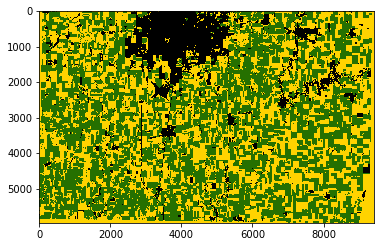

In [ ]:
# prediction

south_pred = model.predict(south_raster)
south_pred = south_pred.reshape((5959, 9425))
cmap = colors.ListedColormap(['#000000', '#ffd300', '#257000'])
bounds = [-1,0.5,1.5,6]
norm = colors.BoundaryNorm(bounds,cmap.N)

c = plt.imshow(south_pred, cmap = cmap, norm = norm)
plt.show()